<a href="https://colab.research.google.com/github/mohmaed7777/Variable-Transformation-Feature-Engineering/blob/main/Variable_Tranformation2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 
print('Setup complete!')

Setup complete!


In [26]:

%pylab inline 
%config InlineBackend.figure_formats = ['retina']
sns.set()

Populating the interactive namespace from numpy and matplotlib


In [27]:
# Load the data : 
df = pd.read_csv('/content/AmesHousing.csv')
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,...,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,...,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,...,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,...,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,...,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,...,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [20]:
# We can keep a copy of original data: 
#copied_data = df.copy()

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [29]:
df.shape

(2930, 82)

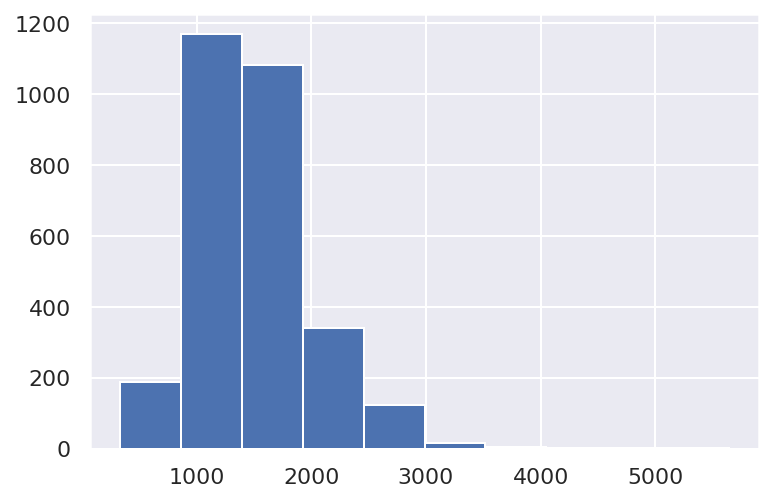

In [30]:
df['Gr Liv Area'].hist()

In [31]:
# Speical Recomondation by the dataset aurthor: 
df = df.loc[df['Gr Liv Area'] <= 4000, :]
print('The number of rows in the data:', df.shape[0])
print('The number of columns in the data:', df.shape[1])

The number of rows in the data: 2925
The number of columns in the data: 82


In [32]:
# create a list of float columns to check for skewing: 
num_cols = df.select_dtypes('number').columns
skew_limit = 0.75 # define a limmit above which we will log transform
skew_vals = df[num_cols].skew()
# showing the skewed colmns: 
skew_cols = skew_vals[abs(skew_vals) > skew_limit].sort_values(ascending=False)
skew_cols

Misc Val           22.225015
Pool Area          18.743766
Lot Area           13.200004
Low Qual Fin SF    12.107629
3Ssn Porch         11.393854
Kitchen AbvGr       4.309573
BsmtFin SF 2        4.135900
Enclosed Porch      4.010586
Bsmt Half Bath      3.965970
Screen Porch        3.953495
Mas Vnr Area        2.565458
Open Porch SF       2.495162
Wood Deck SF        1.848286
SalePrice           1.591072
MS SubClass         1.356549
Lot Frontage        1.111071
1st Flr SF          0.942615
Bsmt Unf SF         0.925021
Gr Liv Area         0.878879
2nd Flr SF          0.847517
BsmtFin SF 1        0.821985
dtype: float64

[Text(0, 0.5, 'Frequncy'),
 Text(0.5, 0, 'Value'),
 Text(0.5, 1.0, 'after np.log1p')]

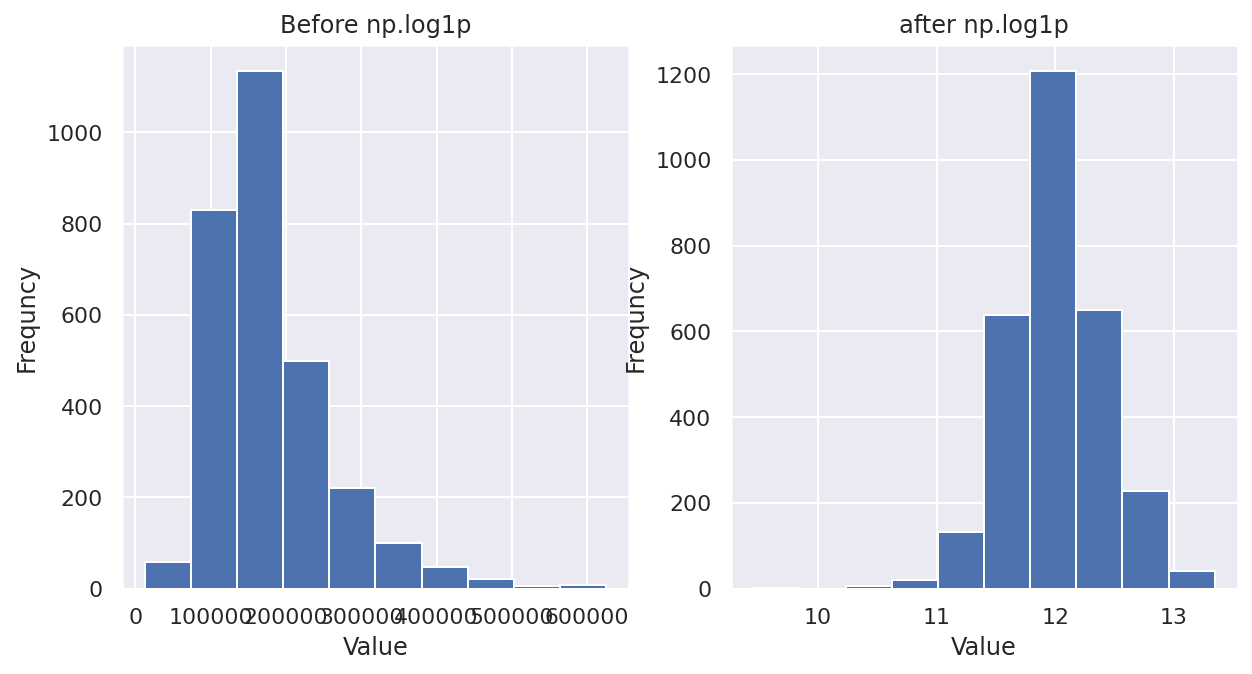

In [40]:
# Lets look at what happens to one of these features, when we apply np.log1p visually : 
# choose the filed: 
field = 'SalePrice'
# Create two subplots & a figure using matplotlib : 
fig, (ax_before, ax_after) = plt.subplots(1,2, figsize=(10,5))
# Create a histogram on the "ax_before" subplot
df['SalePrice'].hist(ax = ax_before)
# Apply a log transformation (numpy syntax) to this column:
df['SalePrice'].apply(np.log1p).hist(ax = ax_after)
# Formatting the titles : 
ax_before.set(title='Before np.log1p',
              ylabel='Frequncy',
              xlabel='Value')
ax_after.set(title='after np.log1p',
              ylabel='Frequncy',
              xlabel='Value')


In [41]:
# perform the skew transformation: 
for col in skew_cols.index.values:
  if col == 'SalePrice':
    continue
  df[col] = df[col].apply(np.log1p)  

In [44]:
# Dealing with the missing values : 
df.isnull().sum().sort_values()

Order                0
Sale Condition       0
Heating QC           0
Central Air          0
1st Flr SF           0
                  ... 
Fireplace Qu      1422
Fence             2354
Alley             2727
Misc Feature      2820
Pool QC           2914
Length: 82, dtype: int64

In [48]:
# Let's pick out just a few numaric columns to illustrate basic features transformations: 
df.select_dtypes('number').columns

Index(['Order', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area',
       'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add',
       'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF',
       'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd',
       'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area',
       'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
       'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold',
       'SalePrice'],
      dtype='object')

In [50]:
# Dropout ununique values : 
df.drop(['Order','PID'],axis=1, inplace=True)

In [52]:
smaller_df = df.loc[:, ['MS SubClass', 'Lot Frontage', 'Lot Area',
       'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add',
       'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF',
       'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd',
       'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area',
       'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
       'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold',
       'SalePrice']]
smaller_df.head()       

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,3.044522,4.955827,10.366309,6,5,1960,1960,4.727388,6.461468,0.000000,6.091310,1080.0,7.412764,0.000000,0.0,7.412764,1.0,0.0,1,0,3,0.693147,7,2,1960.0,2.0,528.0,5.351858,4.143135,0.0,0.0,0.000000,0.0,0.000000,5,2010,215000
1,3.044522,4.394449,9.360741,5,6,1961,1961,0.000000,6.150603,4.976734,5.602119,882.0,6.799056,0.000000,0.0,6.799056,0.0,0.0,1,0,2,0.693147,5,0,1961.0,1.0,730.0,4.948760,0.000000,0.0,0.0,4.795791,0.0,0.000000,6,2010,105000
2,3.044522,4.406719,9.565775,6,6,1958,1958,4.691348,6.828712,0.000000,6.008813,1329.0,7.192934,0.000000,0.0,7.192934,0.0,0.0,1,1,3,0.693147,6,0,1958.0,1.0,312.0,5.976351,3.610918,0.0,0.0,0.000000,0.0,9.433564,6,2010,172000
3,3.044522,4.543295,9.320181,7,5,1968,1968,0.000000,6.971669,0.000000,6.952729,2110.0,7.654917,0.000000,0.0,7.654917,1.0,0.0,2,1,3,0.693147,8,2,1968.0,2.0,522.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,4,2010,244000
4,4.110874,4.317488,9.534668,5,5,1997,1998,0.000000,6.674561,0.000000,4.927254,928.0,6.834109,6.553933,0.0,7.396335,0.0,0.0,2,1,3,0.693147,6,1,1997.0,2.0,482.0,5.361292,3.555348,0.0,0.0,0.000000,0.0,0.000000,3,2010,189900


In [55]:
smaller_df.isnull().sum()

MS SubClass          0
Lot Frontage       490
Lot Area             0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Mas Vnr Area        23
BsmtFin SF 1         1
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
1st Flr SF           0
2nd Flr SF           0
Low Qual Fin SF      0
Gr Liv Area          0
Bsmt Full Bath       2
Bsmt Half Bath       2
Full Bath            0
Half Bath            0
Bedroom AbvGr        0
Kitchen AbvGr        0
TotRms AbvGrd        0
Fireplaces           0
Garage Yr Blt      159
Garage Cars          1
Garage Area          1
Wood Deck SF         0
Open Porch SF        0
Enclosed Porch       0
3Ssn Porch           0
Screen Porch         0
Pool Area            0
Misc Val             0
Mo Sold              0
Yr Sold              0
SalePrice            0
dtype: int64

In [56]:
# Drop out any column contain at least one missing value in the samller_df: 
smaller_df.dropna(axis=1, inplace=True)
smaller_df.head()

,MS SubClass,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,3.044522,10.366309,6,5,1960,1960,7.412764,0.000000,0.0,7.412764,1,0,3,0.693147,7,2,5.351858,4.143135,0.0,0.0,0.000000,0.0,0.000000,5,2010,215000
1,3.044522,9.360741,5,6,1961,1961,6.799056,0.000000,0.0,6.799056,1,0,2,0.693147,5,0,4.948760,0.000000,0.0,0.0,4.795791,0.0,0.000000,6,2010,105000
2,3.044522,9.565775,6,6,1958,1958,7.192934,0.000000,0.0,7.192934,1,1,3,0.693147,6,0,5.976351,3.610918,0.0,0.0,0.000000,0.0,9.433564,6,2010,172000
3,3.044522,9.320181,7,5,1968,1968,7.654917,0.000000,0.0,7.654917,2,1,3,0.693147,8,2,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,4,2010,244000
4,4.110874,9.534668,5,5,1997,1998,6.834109,6.553933,0.0,7.396335,2,1,3,0.693147,6,1,5.361292,3.555348,0.0,0.0,0.000000,0.0,0.000000,3,2010,189900


In [57]:
smaller_df.describe().T

,count,mean,std,min,25%,50%,75%,max
MS SubClass,2925.0,3.824137,0.694224,3.044522,3.044522,3.931826,4.262680,5.252273
Lot Area,2925.0,9.090148,0.508309,7.170888,8.914492,9.151545,9.351493,12.279537
Overall Qual,2925.0,6.088205,1.402953,1.000000,5.000000,6.000000,7.000000,10.000000
Overall Cond,2925.0,5.563761,1.112262,1.000000,5.000000,5.000000,6.000000,9.000000
Year Built,2925.0,1971.302906,30.242474,1872.000000,1954.000000,1973.000000,2001.000000,2010.000000
Year Remod/Add,2925.0,1984.234188,20.861774,1950.000000,1965.000000,1993.000000,2004.000000,2010.000000
1st Flr SF,2925.0,7.002348,0.319027,5.814131,6.776507,6.987490,7.232733,8.248267
2nd Flr SF,2925.0,2.815976,3.273842,0.000000,0.000000,0.000000,6.555357,7.529943
Low Qual Fin SF,2925.0,0.076942,0.658804,0.000000,0.000000,0.000000,0.000000,6.970730
Gr Liv Area,2925.0,7.258784,0.320753,5.814131,7.027315,7.273786,7.462215,8.248267


In [60]:
# There appears to be one NA so we can fillter all missing data with fillna() method: 
smaller_df = smaller_df.fillna(0)
smaller_df.head()

,MS SubClass,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,3.044522,10.366309,6,5,1960,1960,7.412764,0.000000,0.0,7.412764,1,0,3,0.693147,7,2,5.351858,4.143135,0.0,0.0,0.000000,0.0,0.000000,5,2010,215000
1,3.044522,9.360741,5,6,1961,1961,6.799056,0.000000,0.0,6.799056,1,0,2,0.693147,5,0,4.948760,0.000000,0.0,0.0,4.795791,0.0,0.000000,6,2010,105000
2,3.044522,9.565775,6,6,1958,1958,7.192934,0.000000,0.0,7.192934,1,1,3,0.693147,6,0,5.976351,3.610918,0.0,0.0,0.000000,0.0,9.433564,6,2010,172000
3,3.044522,9.320181,7,5,1968,1968,7.654917,0.000000,0.0,7.654917,2,1,3,0.693147,8,2,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,4,2010,244000
4,4.110874,9.534668,5,5,1997,1998,6.834109,6.553933,0.0,7.396335,2,1,3,0.693147,6,1,5.361292,3.555348,0.0,0.0,0.000000,0.0,0.000000,3,2010,189900


In [63]:
smaller_df.describe().T

,count,mean,std,min,25%,50%,75%,max
MS SubClass,2925.0,3.824137,0.694224,3.044522,3.044522,3.931826,4.262680,5.252273
Lot Area,2925.0,9.090148,0.508309,7.170888,8.914492,9.151545,9.351493,12.279537
Overall Qual,2925.0,6.088205,1.402953,1.000000,5.000000,6.000000,7.000000,10.000000
Overall Cond,2925.0,5.563761,1.112262,1.000000,5.000000,5.000000,6.000000,9.000000
Year Built,2925.0,1971.302906,30.242474,1872.000000,1954.000000,1973.000000,2001.000000,2010.000000
Year Remod/Add,2925.0,1984.234188,20.861774,1950.000000,1965.000000,1993.000000,2004.000000,2010.000000
1st Flr SF,2925.0,7.002348,0.319027,5.814131,6.776507,6.987490,7.232733,8.248267
2nd Flr SF,2925.0,2.815976,3.273842,0.000000,0.000000,0.000000,6.555357,7.529943
Low Qual Fin SF,2925.0,0.076942,0.658804,0.000000,0.000000,0.000000,0.000000,6.970730
Gr Liv Area,2925.0,7.258784,0.320753,5.814131,7.027315,7.273786,7.462215,8.248267
